In [1]:
import sys
sys.path.append('../../30_data_tools/')

from helper import load_dotenv
from pathlib import Path
from PIL import Image, ImageOps
import numpy as np
import math
import plotly.express as px
from scipy.ndimage import gaussian_filter
from random import randrange, choices, shuffle
from tqdm.auto import tqdm
import json
from skimage.metrics import structural_similarity as ssim

In [12]:
def get_fft( input_img ):
    ft = np.fft.ifftshift(np.array(input_img))
    ft = np.fft.fft2(ft)
    ft = np.fft.fftshift(ft)
    
    return ft

def limit_frequencies( fft, inner_limit=None, outer_limit=None ):
    center = (fft.shape[1] / 2, fft.shape[0] / 2)
    for y in range(fft.shape[0]):
        for x in range(fft.shape[1]):
            r = math.sqrt( abs(center[0] - x) ** 2 + abs(center[1] - y) ** 2 )
            
            if outer_limit is not None and r > outer_limit:
                fft[y,x] = 1
    
            if inner_limit is not None and r < inner_limit:
                fft[y,x] = 1

    return fft

def get_frequency_representation( img ):
    fft = np.abs( limit_frequencies( get_fft(img), inner_limit=5 ) )
    fft = gaussian_filter(fft, sigma=3)

    return fft

In [3]:
dotenv = load_dotenv()

In [4]:
moire_tiles = list((dotenv['TILE_DATASET_DIR'] / 'train' / 'moire').glob('./*.jpg'))

# Hypothesentest

In [32]:
moire_tile_path = moire_tiles[10012]

In [33]:
non_moire_tile_path = moire_tile_path.parent.parent / 'no_moire' / moire_tile_path.name
moire_tile = Image.open( moire_tile_path ).convert('L')
non_moire_tile = Image.open( non_moire_tile_path ).convert('L')

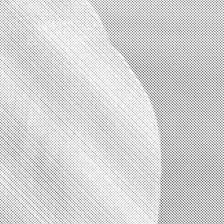

In [34]:
moire_tile

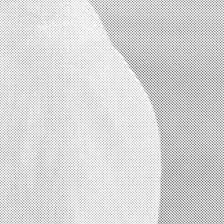

In [35]:
non_moire_tile

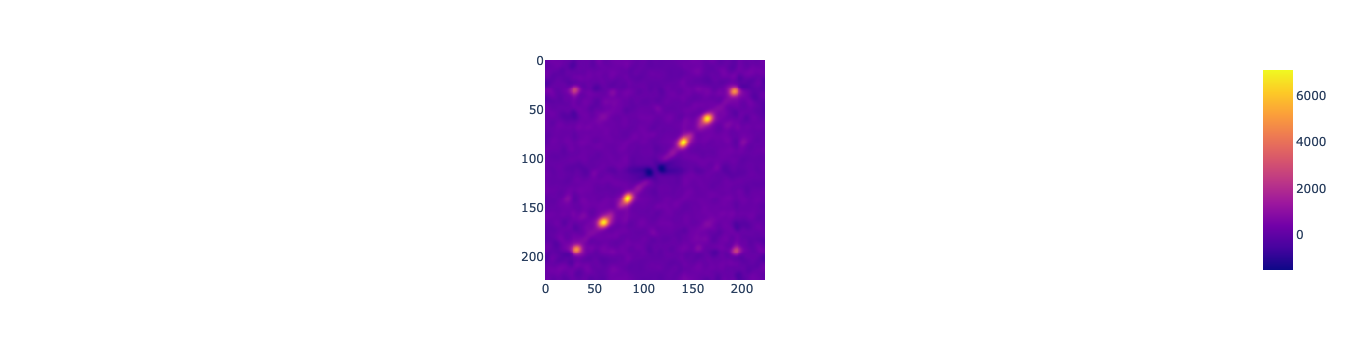

In [36]:
px.imshow(
    get_frequency_representation(moire_tile) - get_frequency_representation(non_moire_tile)
)

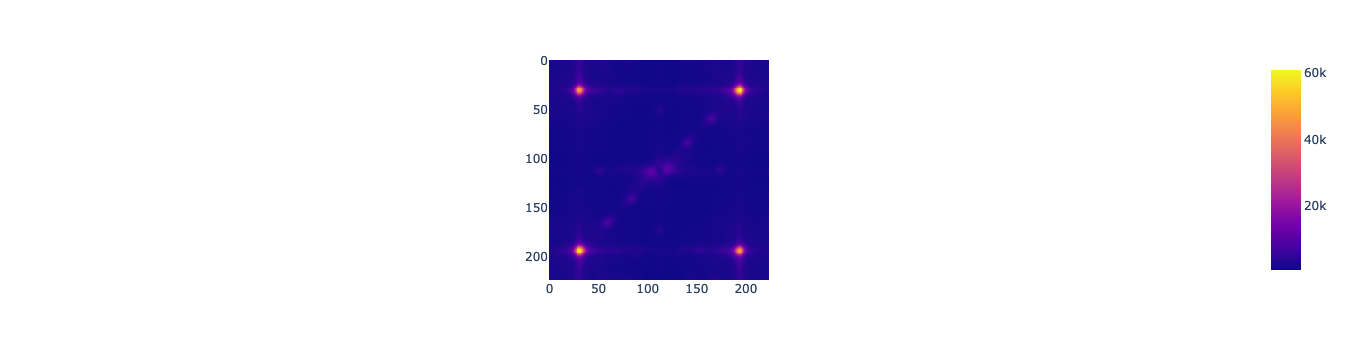

In [37]:
px.imshow(get_frequency_representation(moire_tile))

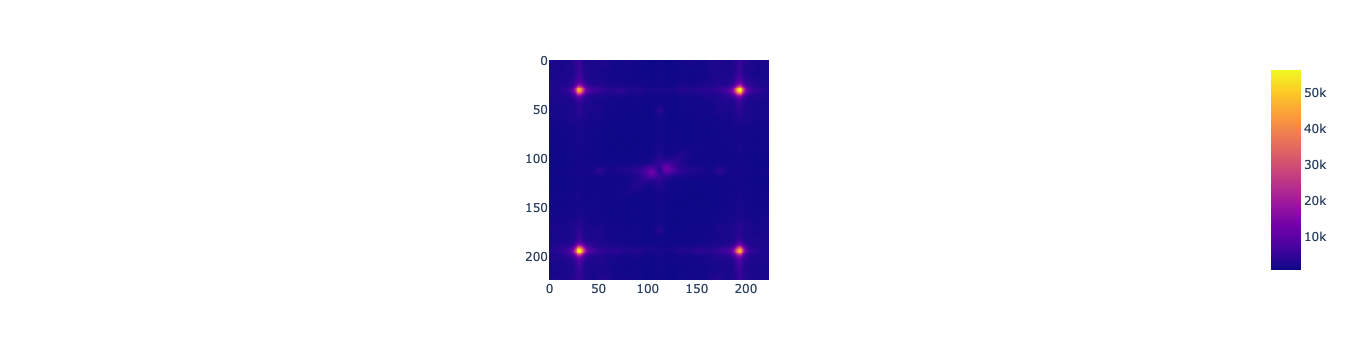

In [38]:
px.imshow(get_frequency_representation(non_moire_tile))